# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = units = "metrics"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q=" #YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}" # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] # YOUR CODE HERE
        city_lng = city_weather['coord']['lon'] # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max'] # YOUR CODE HERE
        city_humidity = city_weather['main']['humidity'] # YOUR CODE HERE
        city_clouds = city_weather['clouds']['all'] # YOUR CODE HERE
        city_wind =  city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country'] # YOUR CODE HERE
        city_date = city_weather['dt'] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ahipara
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | chapais
Processing Record 4 of Set 1 | toliary
City not found. Skipping...
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | ishigaki
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 13 of Set 1 | adeje
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | hervey bay
Processing Record 16 of Set 1 | marystown
Processing Record 17 of Set 1 | korla
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | lidzbark warminski
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | hithadhoo
Processing Reco

Processing Record 32 of Set 4 | namatanai
Processing Record 33 of Set 4 | poum
Processing Record 34 of Set 4 | srednekolymsk
Processing Record 35 of Set 4 | san juan
Processing Record 36 of Set 4 | toulepleu
City not found. Skipping...
Processing Record 37 of Set 4 | abu kamal
Processing Record 38 of Set 4 | sabzevar
Processing Record 39 of Set 4 | vaini
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | morden
Processing Record 43 of Set 4 | bayir
Processing Record 44 of Set 4 | cam ranh
Processing Record 45 of Set 4 | coahuayana
Processing Record 46 of Set 4 | raudeberg
Processing Record 47 of Set 4 | geraldton
Processing Record 48 of Set 4 | samarai
Processing Record 49 of Set 4 | hobyo
Processing Record 0 of Set 5 | sur
Processing Record 1 of Set 5 | puerto ayora
Processing Record 2 of Set 5 | tuy hoa
Processing Record 3 of Set 5 | fayaoue
Processing Record 4 of Set 5 | baykit
Processing Record 5 of Set 5 | san estani

Processing Record 23 of Set 8 | alta floresta
Processing Record 24 of Set 8 | chato
Processing Record 25 of Set 8 | college
Processing Record 26 of Set 8 | port macquarie
Processing Record 27 of Set 8 | dudinka
Processing Record 28 of Set 8 | byron bay
Processing Record 29 of Set 8 | laguna
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | hualmay
Processing Record 32 of Set 8 | kulhudhuffushi
Processing Record 33 of Set 8 | lebyazhye
Processing Record 34 of Set 8 | zemio
Processing Record 35 of Set 8 | nantucket
Processing Record 36 of Set 8 | arinos
Processing Record 37 of Set 8 | newport
Processing Record 38 of Set 8 | george
Processing Record 39 of Set 8 | magnor
Processing Record 40 of Set 8 | buin
Processing Record 41 of Set 8 | guaira
Processing Record 42 of Set 8 | lavumisa
Processing Record 43 of Set 8 | upington
Processing Record 44 of Set 8 | palora
Processing Record 45 of Set 8 | sri aman
Processing Record 46 of Set 8 | mattawa
Processing Record 47 

Processing Record 15 of Set 12 | am timan
Processing Record 16 of Set 12 | tutoia
Processing Record 17 of Set 12 | ust-nera
Processing Record 18 of Set 12 | calbuco
Processing Record 19 of Set 12 | honiara
Processing Record 20 of Set 12 | san patricio
Processing Record 21 of Set 12 | sechura
Processing Record 22 of Set 12 | qurayyat
Processing Record 23 of Set 12 | henties bay
Processing Record 24 of Set 12 | coquimbo
Processing Record 25 of Set 12 | dubrovka
Processing Record 26 of Set 12 | kaduqli
Processing Record 27 of Set 12 | oranjestad
Processing Record 28 of Set 12 | sorvag
City not found. Skipping...
Processing Record 29 of Set 12 | harnai
Processing Record 30 of Set 12 | akdepe
Processing Record 31 of Set 12 | lesnikovo
Processing Record 32 of Set 12 | klamath falls
Processing Record 33 of Set 12 | kuusamo
Processing Record 34 of Set 12 | necochea
Processing Record 35 of Set 12 | nianzishan
Processing Record 36 of Set 12 | santa isabel do rio negro
Processing Record 37 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ahipara,-35.1667,173.1667,294.39,55,0,3.53,NZ,1678237878
1,nanortalik,60.1432,-45.2371,270.93,81,100,2.96,GL,1678237879
2,chapais,49.7834,-74.8492,264.03,94,100,5.14,CA,1678237879
3,port elizabeth,-33.9180,25.5701,294.99,88,2,1.79,ZA,1678237611
4,kavaratti,10.5669,72.6420,300.56,67,4,2.10,IN,1678237881


In [15]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ahipara,-35.1667,173.1667,294.39,55,0,3.53,NZ,1678237878
1,nanortalik,60.1432,-45.2371,270.93,81,100,2.96,GL,1678237879
2,chapais,49.7834,-74.8492,264.03,94,100,5.14,CA,1678237879
3,port elizabeth,-33.9180,25.5701,294.99,88,2,1.79,ZA,1678237611
4,kavaratti,10.5669,72.6420,300.56,67,4,2.10,IN,1678237881


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

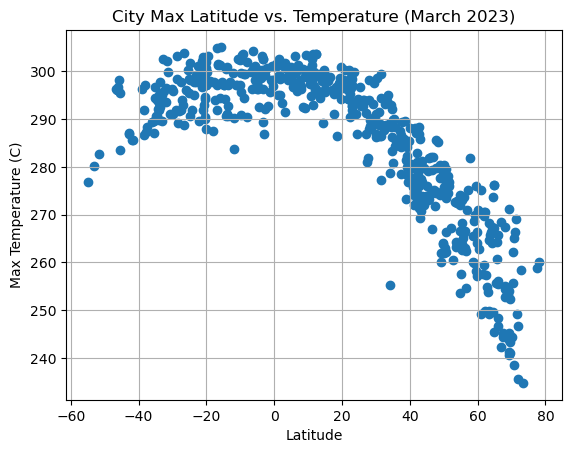

In [17]:
# Build scatter plot for latitude vs. temperature(your code)
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties(your code)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (March 2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

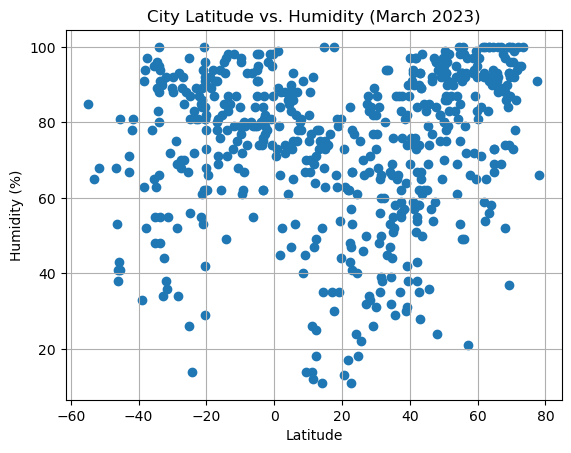

In [18]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (March 2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

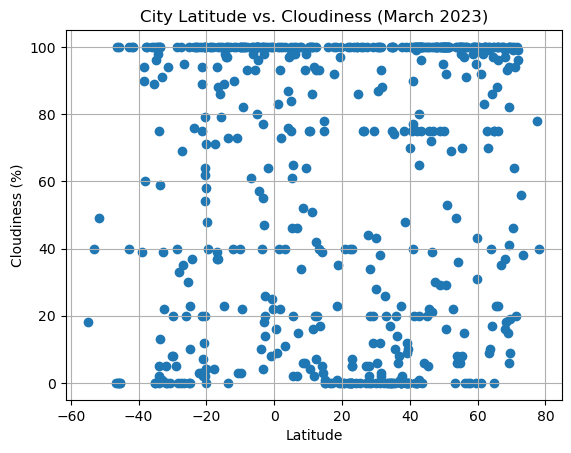

In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (March 2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

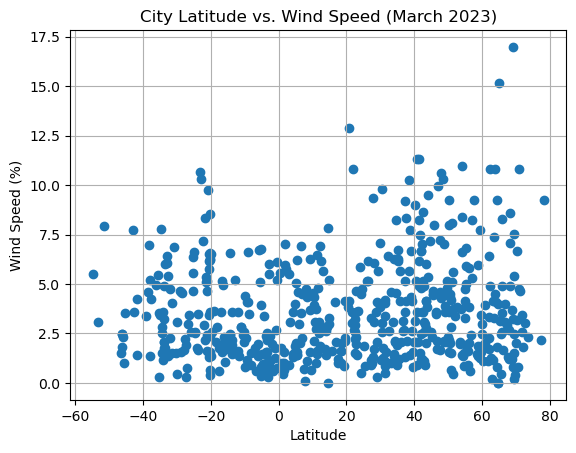

In [20]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title(f"City Latitude vs. Wind Speed (March 2023)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, y_label, text_coordinates):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nanortalik,60.1432,-45.2371,270.93,81,100,2.96,GL,1678237879
2,chapais,49.7834,-74.8492,264.03,94,100,5.14,CA,1678237879
4,kavaratti,10.5669,72.6420,300.56,67,4,2.10,IN,1678237881
6,ishigaki,24.3448,124.1572,293.80,61,100,4.48,JP,1678237882
7,tuktoyaktuk,69.4541,-133.0374,252.35,87,19,7.52,CA,1678237882


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ahipara,-35.1667,173.1667,294.39,55,0,3.53,NZ,1678237878
3,port elizabeth,-33.9180,25.5701,294.99,88,2,1.79,ZA,1678237611
5,bredasdorp,-34.5322,20.0403,290.60,89,100,2.53,ZA,1678237881
9,mataura,-46.1927,168.8643,296.19,38,0,2.46,NZ,1678237883
12,hervey bay,-25.2986,152.8535,300.22,67,30,5.55,AU,1678237688


###  Temperature vs. Latitude Linear Regression Plot

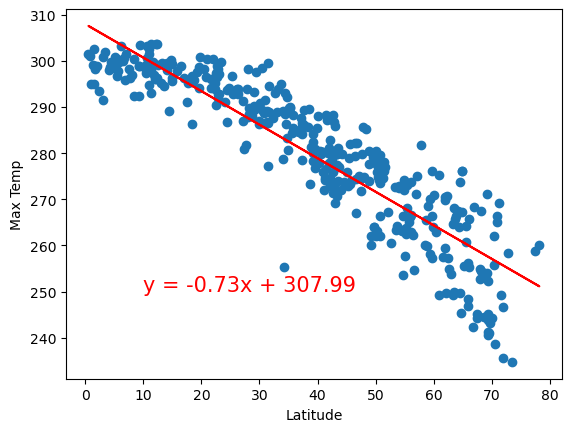

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,'Max Temp',(10,250))

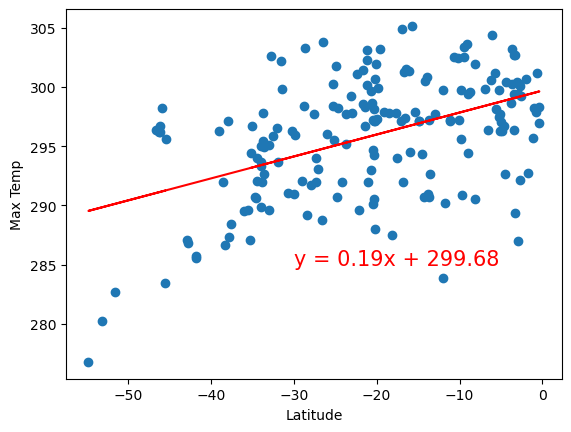

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values,'Max Temp',(-30,285))

**Discussion about the linear relationship:** 
    In northern hemisphere, temperature decrease when Latitude increases; 
    In southern hemisphere, temperature increase when latitude increase.

### Humidity vs. Latitude Linear Regression Plot

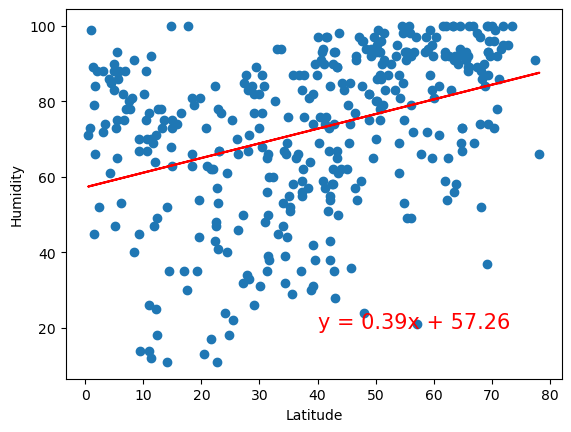

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,'Humidity',(40,20))

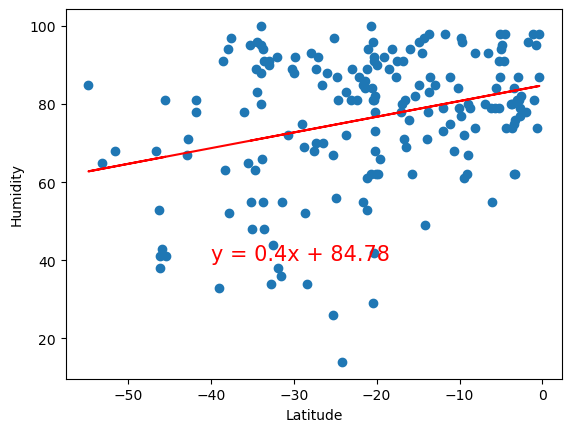

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,'Humidity',(-40,40))

**Discussion about the linear relationship:** 
    In both northern and southern hemisphere, humidity increase when latitue increase.

### Cloudiness vs. Latitude Linear Regression Plot

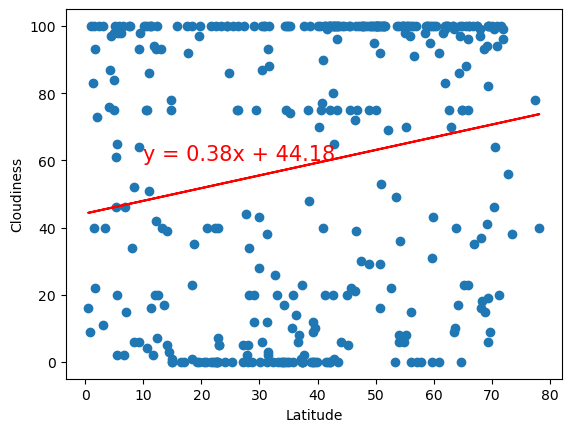

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,'Cloudiness',(10,60))

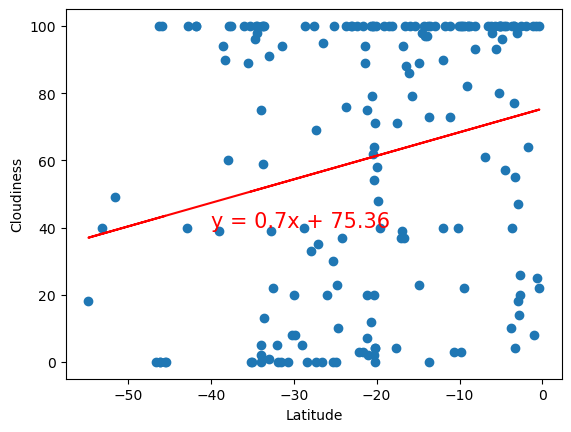

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,'Cloudiness',(-40,40))

**Discussion about the linear relationship:** 
    In both northern and southern hemisphere, Cloudiness increase when latitue increase.

### Wind Speed vs. Latitude Linear Regression Plot

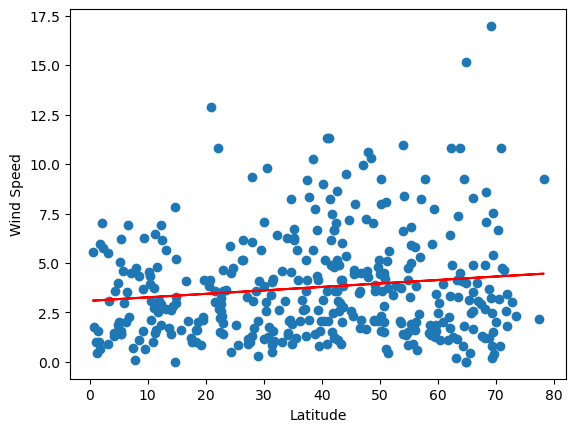

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,'Wind Speed',(10,20))

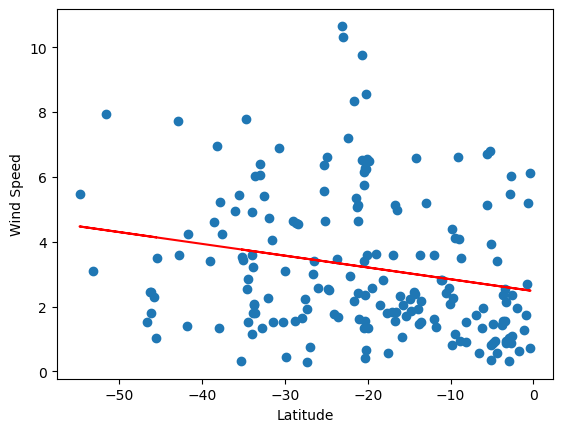

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values,'Wind Speed',(-50,12))

**Discussion about the linear relationship:** 
    In northern hemisphere, Wind Speed increase when Latitude increases; 
    In southern hemisphere, Wind Speed decrease when latitude increase.